# Identifying the Target

### Loading the Data 

In [2]:
import pandas as pd
listing_url = "./listings_summary.csv.zip"

listings_df = pd.read_csv(listing_url)

In [7]:
listings_df.shape

(22552, 96)

In [8]:
pd.set_option('display.max_rows',100)

In [11]:
# listings_df.select_dtypes('object').shape

In [3]:
listings_df.shape

(22552, 96)

> Comment and then uncomment the line below.

In [13]:
# listings_df.info()

In [6]:
# df[:3].T

### Choosing a target

In [22]:
numeric_cols = listings_df.select_dtypes('number')

In [24]:
numeric_cols[:2].T

,0,1
id,2.015000e+03,2.695000e+03
scrape_id,2.018111e+13,2.018111e+13
thumbnail_url,NaN,NaN
medium_url,NaN,NaN
xl_picture_url,NaN,NaN
host_id,2.217000e+03,2.986000e+03
host_acceptance_rate,NaN,NaN
host_listings_count,4.000000e+00,1.000000e+00
host_total_listings_count,4.000000e+00,1.000000e+00
latitude,5.253454e+01,5.254851e+01


In [40]:
object_df.iloc[:, bool_nums][:3]

,host_response_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,$60.00,NaN,NaN,$200.00,$30.00,$28.00
1,NaN,$17.00,NaN,NaN,$0.00,$0.00,$0.00
2,100%,$90.00,$520.00,"$1,900.00",$200.00,$50.00,$20.00


* revenue per person
* minimum_nights_stay
* five star reviews

* price
* availability_365
* reviews_scores_rating

In [ ]:
* weekly_price, monthly_price

* revenue -> (365 - availability_365)*price

In [41]:
object_df[['price', 'weekly_price', 'monthly_price']].isna().sum()

price                0
weekly_price     18871
monthly_price    19893
dtype: int64

In [47]:
def word_in_cols(word):
    return [col for col in numeric_cols.columns if word in col]

In [49]:
avail_cols = word_in_cols('availability')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ea92a90>,
      dtype=object)

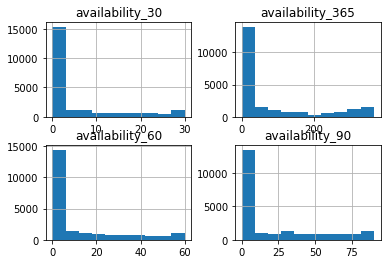

In [58]:
listings_df[avail_cols].hist()

In [64]:
price_num = pd.to_numeric(listings_df['price'].map(lambda x: x[1:].replace(",", "")))

[(0, 100)]

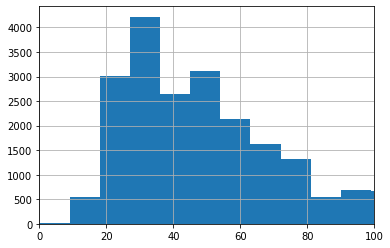

In [69]:
ax = b.hist(bins = 1000)
ax.set(xlim = (0, 100))

In [70]:
price_num.describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [42]:
object_df.shape

(22552, 62)

In [45]:
[col for col in listings_df.columns if 'rating' in col]

['review_scores_rating']

In [25]:
object_df = listings_df.select_dtypes('object')

In [26]:
object_df['monthly_price']

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',


In [15]:
scrape_id = listings_df['scrape_id']

In [30]:
def contains_numbers(column):
    # matches price or percentage but no date     
    regex_string = (r'^(?!.*www|.*-|.*\/|.*[A-Za-z]|.* ).*\d.*')
    return column.str.contains(regex_string).all()

In [32]:
# contains_numbers(object_df['country'])

almost_num_df = object_df.apply(lambda col: contains_numbers(col))

In [36]:
bool_nums = almost_num_df.values

,host_response_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,$60.00,NaN,NaN,$200.00,$30.00,$28.00
1,NaN,$17.00,NaN,NaN,$0.00,$0.00,$0.00
2,100%,$90.00,$520.00,"$1,900.00",$200.00,$50.00,$20.00


Which column would you choose?  Are there any combinations of columns you may choose?

### Choosing a target

In [15]:
price_cols = [col for col in listings_df.columns if 'price' in col]

In [17]:
listings_df[price_cols][:2]

,price,weekly_price,monthly_price
0,$60.00,NaN,NaN
1,$17.00,NaN,NaN


### Choosing the price

* Coercing 
* plotting

### Finding Missing Values

Find zero values

### Reassign 

### Summary

### Resources

[detecting missing values](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

[detecting outliers](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)